## Dynamic Ensemble Models Research

### Task 1: Implement the simple logistic regression model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('allwine.csv')
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,-0.743787,0.805266,-1.455948,-0.541531,-0.334525,-0.539436,-0.978159,0.146723,-0.755850,-1.297136,0
1,1,-0.520914,1.798500,-1.455948,-0.047918,0.129345,0.787432,-0.998211,-1.220838,-0.062351,-0.960761,0
2,2,-0.520914,1.136344,-1.251203,-0.259467,0.002835,-0.160331,-0.994200,-0.956148,-0.235726,-0.960761,0
3,3,1.373509,-1.512280,1.410480,-0.541531,-0.355610,0.029222,-0.974148,-1.397297,-0.640267,-0.960761,1
4,4,-0.743787,0.805266,-1.455948,-0.541531,-0.334525,-0.539436,-0.978159,0.146723,-0.755850,-1.297136,0


In [3]:
df.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3198.000000,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3.198000e+03,3198.000000
mean,1598.500000,-3.732682e-16,-3.643809e-16,1.688594e-16,5.332403e-17,-1.777468e-16,-6.221137e-17,-1.848566e-15,2.132961e-16,-3.377189e-16,-3.554936e-17,0.534709
std,923.327407,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,0.498872
min,0.000000,-2.303900e+00,-2.395155e+00,-1.623825e+00,-1.246692e+00,-1.683967e+00,-1.487200e+00,-1.133162e+00,-3.250120e+00,-2.085055e+00,-2.138075e+00,0.000000
25%,799.250000,-6.880688e-01,-7.413923e-01,-9.041204e-01,-4.710149e-01,-3.766953e-01,-7.930922e-01,-9.992135e-01,-7.796891e-01,-6.402666e-01,-7.137768e-01,0.000000
50%,1598.500000,-1.883037e-01,-3.776619e-02,-6.651164e-02,-2.594666e-01,-1.744349e-01,-2.140109e-01,-7.166201e-04,-2.683110e-03,-1.977143e-01,-1.262511e-01,1.000000
75%,2397.750000,5.638545e-01,6.221545e-01,7.962457e-01,6.705718e-02,8.597896e-02,5.481191e-01,9.990931e-01,7.564772e-01,4.338530e-01,6.383188e-01,1.000000
max,3197.000000,4.580738e+00,5.932391e+00,3.824068e+00,9.138676e+00,1.115258e+01,5.245422e+00,1.140202e+00,3.769595e+00,7.944553e+00,4.311531e+00,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3198 non-null   int64  
 1   fixed acidity        3198 non-null   float64
 2   volatile acidity     3198 non-null   float64
 3   citric acid          3198 non-null   float64
 4   residual sugar       3198 non-null   float64
 5   chlorides            3198 non-null   float64
 6   free sulfur dioxide  3198 non-null   float64
 7   density              3198 non-null   float64
 8   pH                   3198 non-null   float64
 9   sulphates            3198 non-null   float64
 10  alcohol              3198 non-null   float64
 11  quality              3198 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 299.9 KB


In [5]:
# Check null values
df.isnull().sum()

Unnamed: 0             0
fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [6]:
# Select columns
df = df.iloc[:, 1:12]

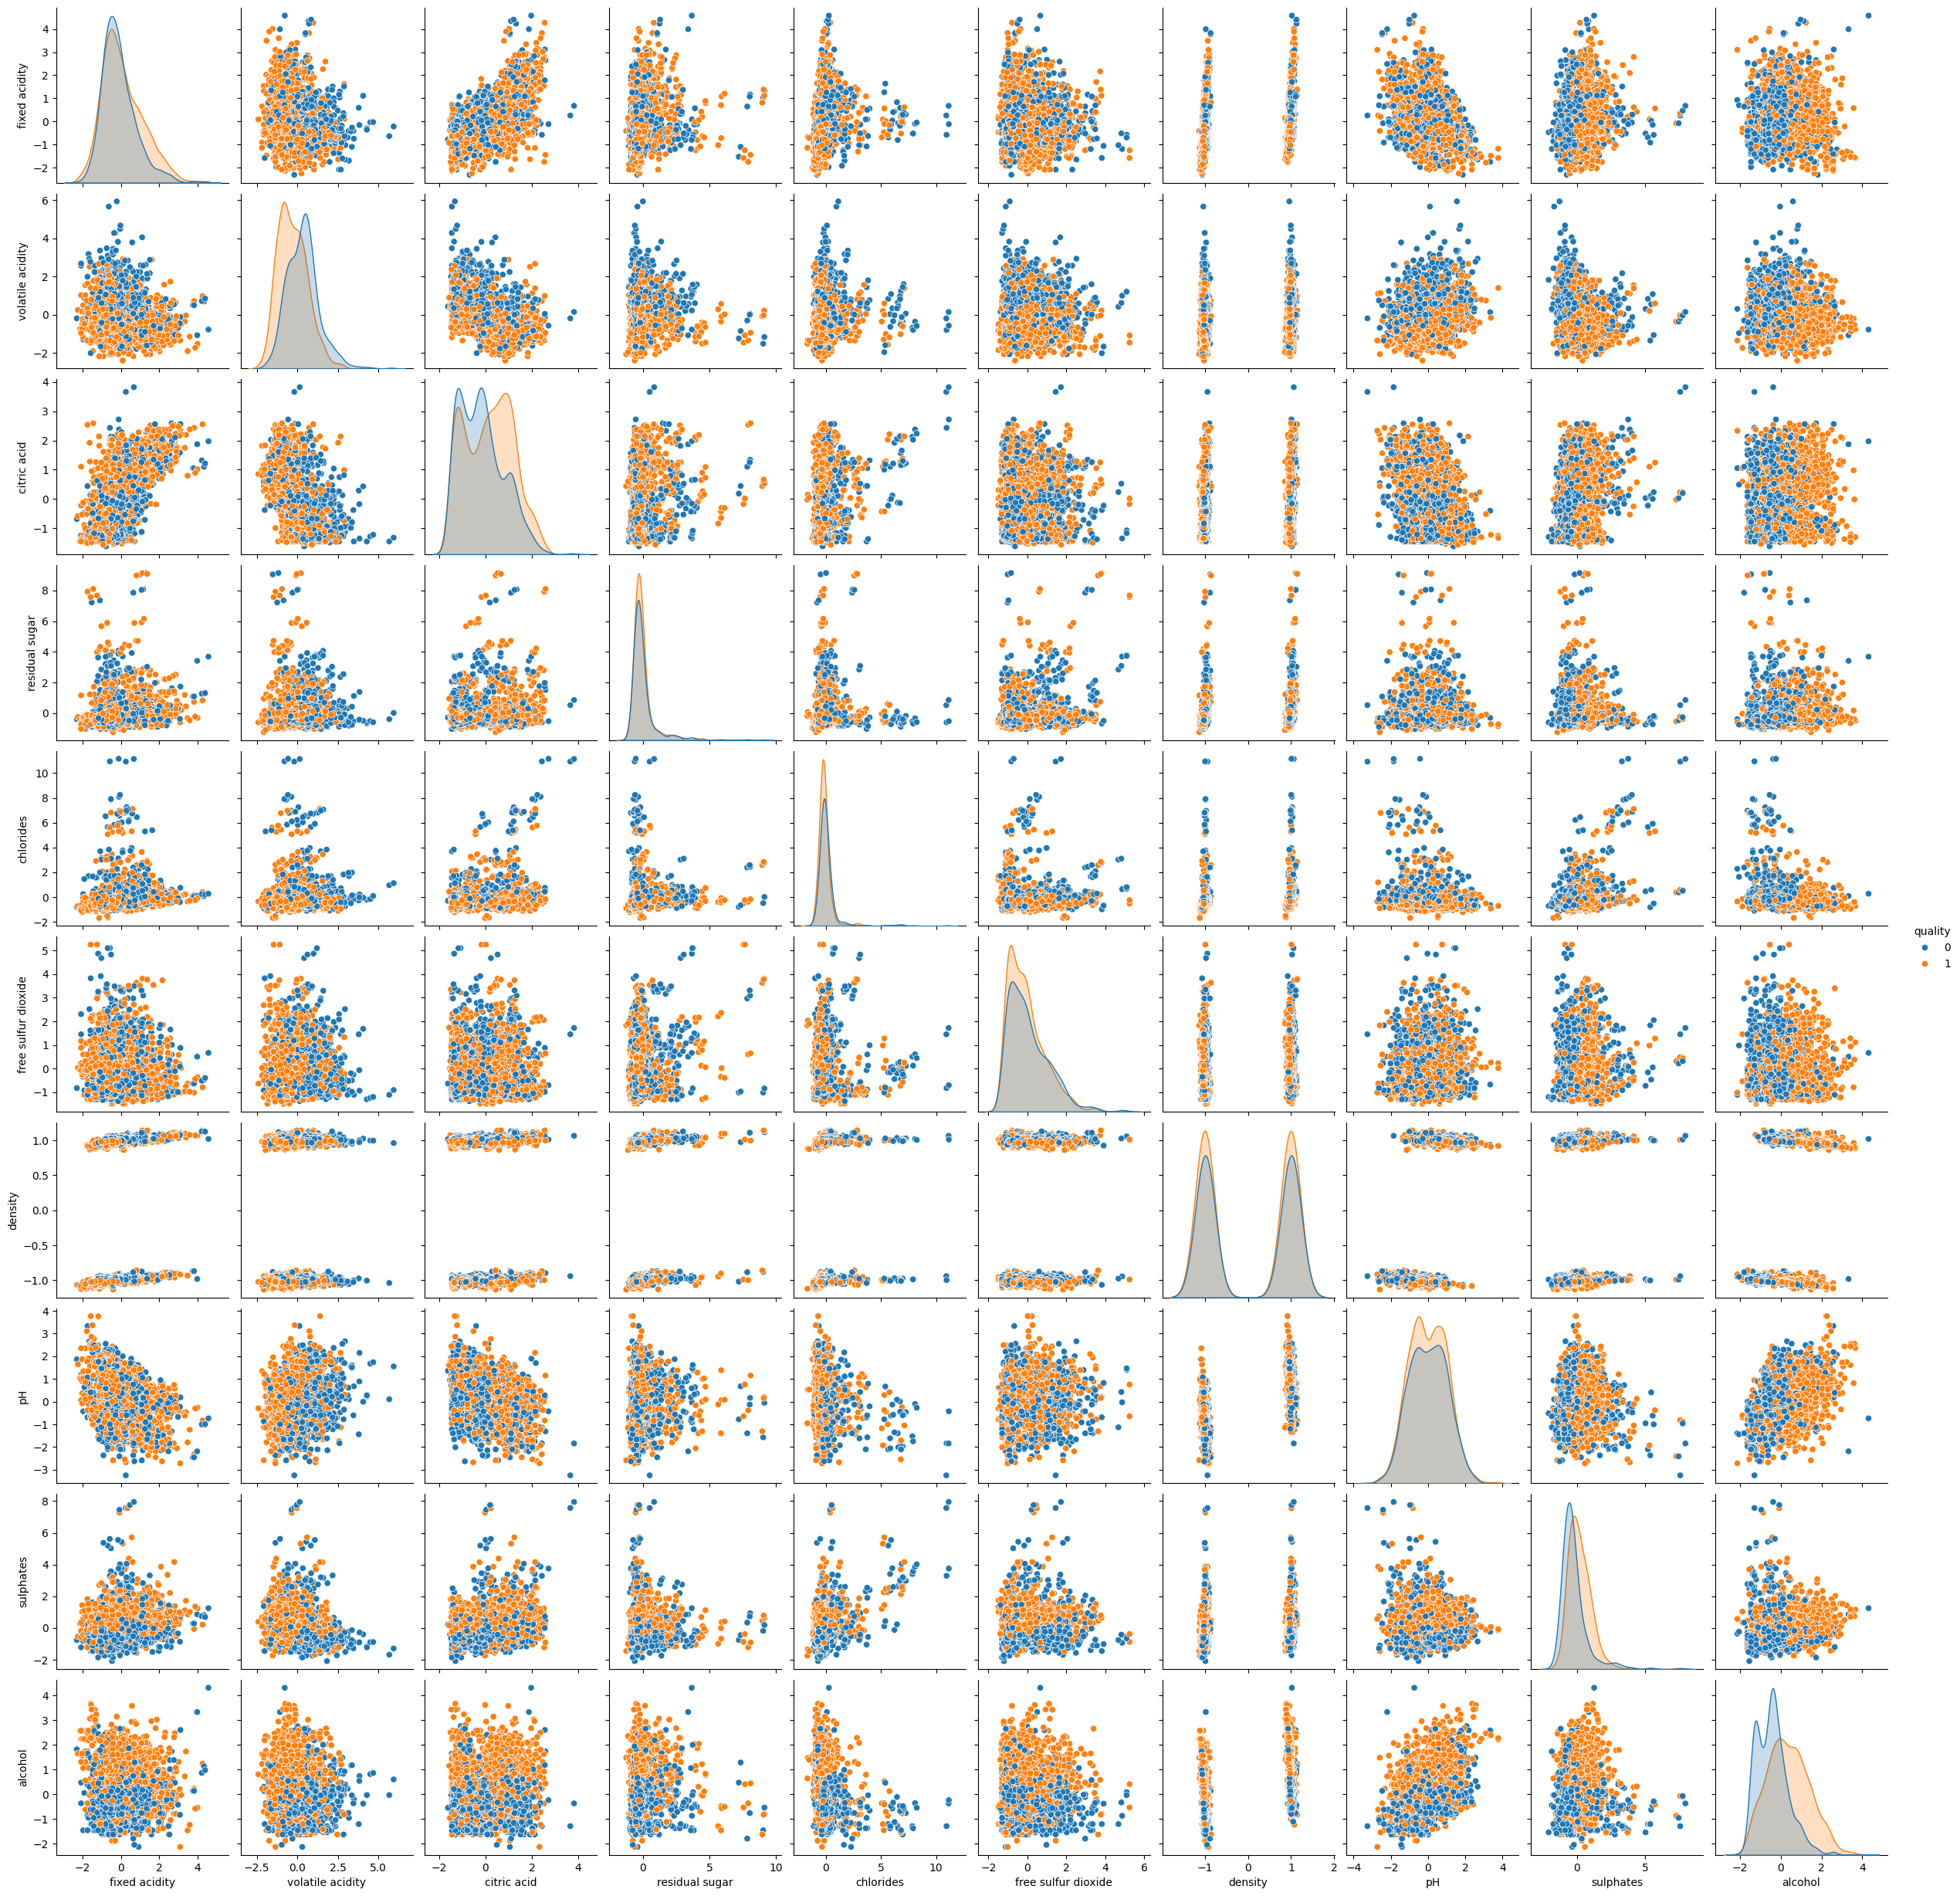

In [7]:
# Plot
sns.pairplot(df, hue='quality')

In [8]:
df['quality'].value_counts()

quality
1    1710
0    1488
Name: count, dtype: int64

In [9]:
# Simple Logistic Regression
# Model Construction
inp_df = df.iloc[:, 0:10]
out_df = df.loc[:, ['quality']]

scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=45)

X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.values
y_ts_arr = y_test.values

print('Input Shape', X_tr_arr.shape)
print('Output Shape', X_test.shape)

Input Shape (2558, 10)
Output Shape (640, 10)


In [10]:
def weightInitialization(n_features):
    w = np.random.randn(1,n_features)
    b = np.random.randn()
    return w, b

def sigmoid_activation(result):
    final_result = 1 / (1 + np.exp(-result))
    return final_result

def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w, X.T) + b)
    Y_T = Y.T
    cost = (-1 / m)*(np.sum((Y_T * np.log(final_result)) + ((1 - Y_T) * (np.log(1 - final_result)))))
    
    #Gradient calculation
    dw = (1 / m) * (np.dot(X.T, (final_result - Y.T).T))
    db = (1 / m) * (np.sum(final_result - Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

def model_train(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        grads, cost = model_optimize(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        
        costs.append(cost)
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

def predict(final_pred, m):
    y_pred = np.zeros((1, m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [11]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)

#Gradient Descent
coeff, gradient, costs = model_train(w, b, X_tr_arr, y_tr_arr, learning_rate=0.01, no_iterations=5000)

#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept', b)

final_train_pred = sigmoid_activation(np.dot(w, X_tr_arr.T) + b)
final_test_pred = sigmoid_activation(np.dot(w, X_ts_arr.T) + b)

m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]

y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy', accuracy_score(y_tr_pred.T, y_tr_arr))

y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy', accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 10


Optimized weights [[ 0.22632905 -0.59872118 -0.33162147  0.0121103  -0.18712075 -0.11522844
  -0.38140705 -0.13433031  0.50954034  1.12525891]]
Optimized intercept 0.26650474416012654
Training Accuracy 0.7412040656763096
Test Accuracy 0.734375


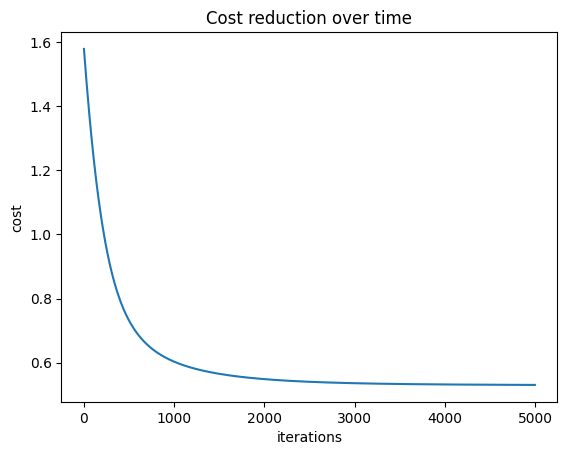

In [12]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('Cost reduction over time')
plt.show()

### Task 2: Implement the dynamic ensemble logistic regression model

In [13]:
def sigmoid(X, theta):
    w = theta[:, 1:11]
    b = theta[0][0]

    return 1 / (1 + np.exp(-(np.dot(w, X.T) + b)))

def likelihood(theta, X, y):
    theta_M, theta_L, theta_R = theta[:, :11], theta[:, 11:22], theta[:, 22:]

    prob = sigmoid(X, theta_L)**y.T * (1 - sigmoid(X, theta_L))**(1 - y.T) * sigmoid(X, theta_M) + \
            sigmoid(X, theta_R)**y.T * (1 - sigmoid(X, theta_R))**(1 - y.T) * (1 - sigmoid(X, theta_M))
            
    L = np.sum(np.log(prob)) / len(X)

    return L

def numerical_differentiation(f, theta, X, y, h=1e-3):
    derivative = np.zeros_like(theta, dtype=float)

    for i in range(theta.size):
        theta_plus = theta.copy()
        theta_plus[0][i] += h
        theta_minus = theta.copy()
        theta_minus[0][i] -= h
        derivative[0][i] = (f(theta_plus, X, y) - f(theta_minus, X, y)) / (2 * h)

    return derivative

from tqdm.notebook import tqdm
def optimize(X, y, lr = 0.01, max_itr = 5000):
    
    nf = X.shape[1]  # The number of features
    theta = np.random.randn(1, 3*(nf+1))
    L_list = []

    for i in tqdm(range(max_itr), ncols=500):
        gradient = numerical_differentiation(likelihood, theta, X, y)

        theta += lr * gradient

        L_list.append(likelihood(theta, X, y))

    return theta, L_list

def predict(X, theta): 

    theta_M, theta_L, theta_R = theta[:, :11], theta[:, 11:22], theta[:, 22:]

    prob_M = sigmoid(X, theta_M)
    prob_L = sigmoid(X, theta_L)
    prob_R = sigmoid(X, theta_R)

    prob = prob_L * prob_M + prob_R * (1 - prob_M)
    
    return prob > 0.5

In [14]:
# Prediction
theta, L_list = optimize(X_tr_arr, y_tr_arr)

y_tr_pred = predict(X_tr_arr, theta)
y_ts_pred = predict(X_ts_arr, theta)

print('Training Accuracy', accuracy_score(y_tr_pred.T, y_tr_arr))
print('Test Accuracy', accuracy_score(y_ts_pred.T, y_ts_arr))

  0%|                                                                                                         …

Training Accuracy 0.7408131352619234
Test Accuracy 0.7484375


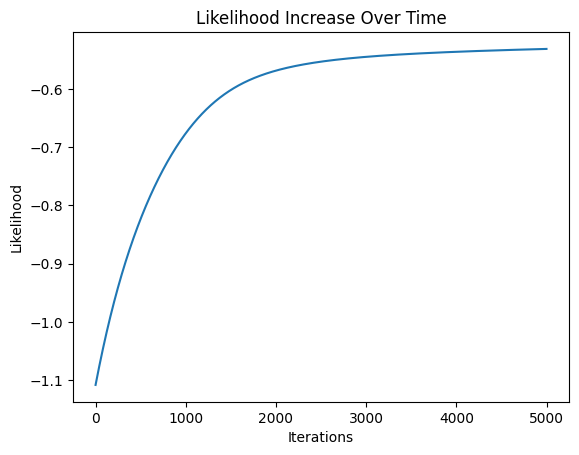

In [15]:
plt.plot(L_list)
plt.ylabel('Likelihood')
plt.xlabel('Iterations')
plt.title('Likelihood Increase Over Time')
plt.show()

### Task 3: Continue the research on deep dynamic ensemble model

In [16]:
def sigmoid(X, theta):
    w = theta[:, 1:11]
    b = theta[0][0]

    return 1 / (1 + np.exp(-(np.dot(w, X.T) + b)))

def h(X, theta, ind=0):

    theta_m = theta[[ind]]
    hm = sigmoid(X, theta_m)

    if 2*ind+2 < len(theta):
        hm = h(X, theta, 2*ind+1) * hm + h(X, theta, 2*ind+2) * (1 - hm)

    return hm

def likelihood(theta, X, y, ind=0):

    theta_m = theta[[ind]]
    p = sigmoid(X, theta_m)

    if 2*ind+2 < len(theta):
        hl = h(X, theta, 2*ind+1)
        hr = h(X, theta, 2*ind+2)
        p = hl*p + hr*(1-p)
    
    L = np.sum(np.log(p**y.T * (1-p)**(1-y.T)+1e-3))/len(X)
    return L
    

def numerical_differentiation(f, theta, X, y, h=1e-6):
    
    derivative = np.zeros_like(theta, dtype=float)

    for i in range(theta.shape[0]):

        for j in range(theta.shape[1]):

            theta_plus = theta.copy()
            theta_plus[i][j] += h
            theta_minus = theta.copy()
            theta_minus[i][j] -= h

            derivative[i][j] = (f(theta_plus, X, y) - f(theta_minus, X, y)) / (2 * h)

    return derivative


from tqdm.notebook import tqdm
def optimize(X, y, lr = 0.01, max_itr = 5000):
    
    nf = X.shape[1]  # The number of features
    layer = 3
    theta = 1/np.sqrt(nf)*np.random.randn(2**layer-1, nf+1)
    # theta = np.zeros([2**layer-1, nf+1])
    L_list = []

    for i in tqdm(range(max_itr), ncols=500):
        gradient = numerical_differentiation(likelihood, theta, X, y)
         
        theta += lr * gradient

        L_list.append(likelihood(theta, X, y))

    return theta, L_list

def predict(X, theta): 
    p = h(X, theta)
    return p > 0.5

In [17]:
# Prediction
theta, L_list = optimize(X_tr_arr, y_tr_arr)

y_tr_pred = predict(X_tr_arr, theta)
y_ts_pred = predict(X_ts_arr, theta)

print('Training Accuracy', accuracy_score(y_tr_pred.flatten(), y_tr_arr.flatten()))
print('Test Accuracy', accuracy_score(y_ts_pred.flatten(), y_ts_arr.flatten()))

  0%|                                                                                                         …

Training Accuracy 0.7408131352619234
Test Accuracy 0.74375


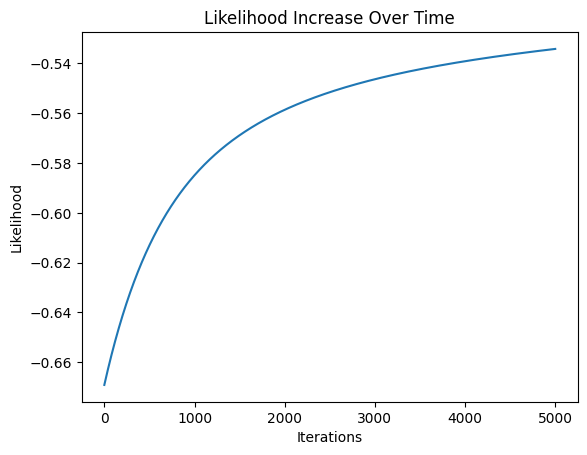

In [18]:
plt.plot(L_list)
plt.ylabel('Likelihood')
plt.xlabel('Iterations')
plt.title('Likelihood Increase Over Time')
plt.show()

### Task 4: Generalize the model to support arbitrary number of layers

In [19]:
# Set layers
layer = 5

In [20]:
def sigmoid(X, theta):
    w = theta[:, 1:11]
    b = theta[0][0]

    return 1 / (1 + np.exp(-(np.dot(w, X.T) + b)))

def h(X, theta, ind=0):

    theta_m = theta[[ind]]
    hm = sigmoid(X, theta_m)

    if 2*ind+2 < len(theta):
        hm = h(X, theta, 2*ind+1) * hm + h(X, theta, 2*ind+2) * (1 - hm)

    return hm

def likelihood(theta, X, y, ind=0):

    theta_m = theta[[ind]]
    p = sigmoid(X, theta_m)

    if 2*ind+2 < len(theta):
        hl = h(X, theta, 2*ind+1)
        hr = h(X, theta, 2*ind+2)
        p = hl*p+hr*(1-p)
    
    L = np.sum(np.log(p**y.T * (1-p)**(1-y.T)+1e-3))/len(X)
    return L
    

def numerical_differentiation(f, theta, X, y, h=1e-3):
    
    derivative = np.zeros_like(theta, dtype=float)

    for i in range(theta.shape[0]):

        for j in range(theta.shape[1]):

            theta_plus = theta.copy()
            theta_plus[i][j] += h
            theta_minus = theta.copy()
            theta_minus[i][j] -= h

            derivative[i][j] = (f(theta_plus, X, y) - f(theta_minus, X, y)) / (2 * h)

    return derivative


from tqdm.notebook import tqdm
def optimize(X, y, layer, lr = 0.01, max_itr = 5000):
    
    nf = X.shape[1]  # The number of features
    layer = layer
    theta = np.random.randn(2**layer-1, nf+1)
    # theta = np.zeros([2**layer-1, nf+1])
    L_list = []

    for i in tqdm(range(max_itr), ncols=500):
        gradient = numerical_differentiation(likelihood, theta, X, y)
         
        theta += lr * gradient

        L_list.append(likelihood(theta, X, y))

    return theta, L_list

def predict(X, theta): 
    p = h(X, theta)
    return p > 0.5

In [21]:
# Prediction
theta, L_list = optimize(X_tr_arr, y_tr_arr, layer)

y_tr_pred = predict(X_tr_arr, theta)
y_ts_pred = predict(X_ts_arr, theta)

print('Training Accuracy', accuracy_score(y_tr_pred.flatten(), y_tr_arr.flatten()))
print('Test Accuracy', accuracy_score(y_ts_pred.flatten(), y_ts_arr.flatten()))

  0%|                                                                                                         …

Training Accuracy 0.6602814698983581
Test Accuracy 0.6390625


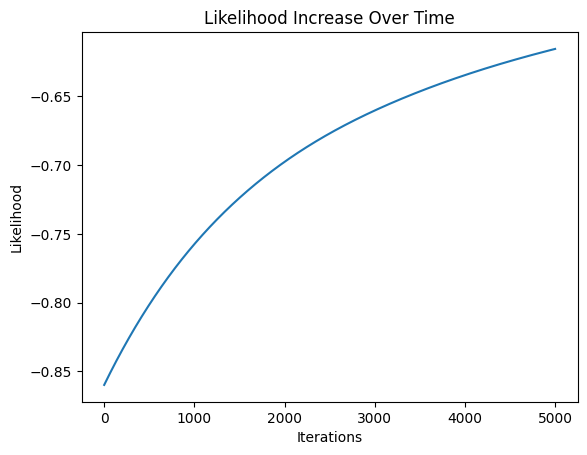

In [26]:
plt.plot(L_list)
plt.ylabel('Likelihood')
plt.xlabel('Iterations')
plt.title('Likelihood Increase Over Time')
plt.show()